> ## Intro

### In this dataset i will try to detect and remove outliers and also make some visualizations and a machine learing model that will predict it is make or female

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv("/kaggle/input/weight-and-height-data-outlier-detection/weight-height.csv")

In [2]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [4]:
df.shape

(10000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [7]:
df.duplicated().sum()

0

array([[<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

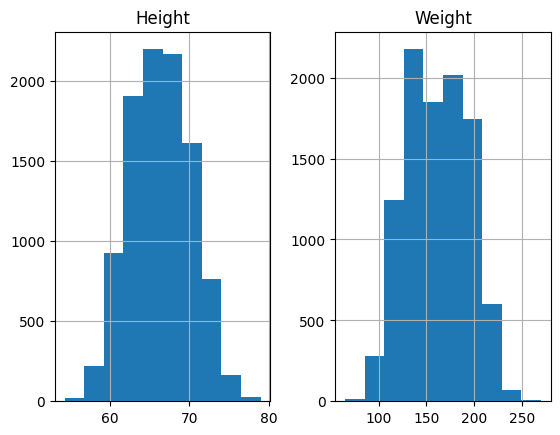

In [8]:
df.hist()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


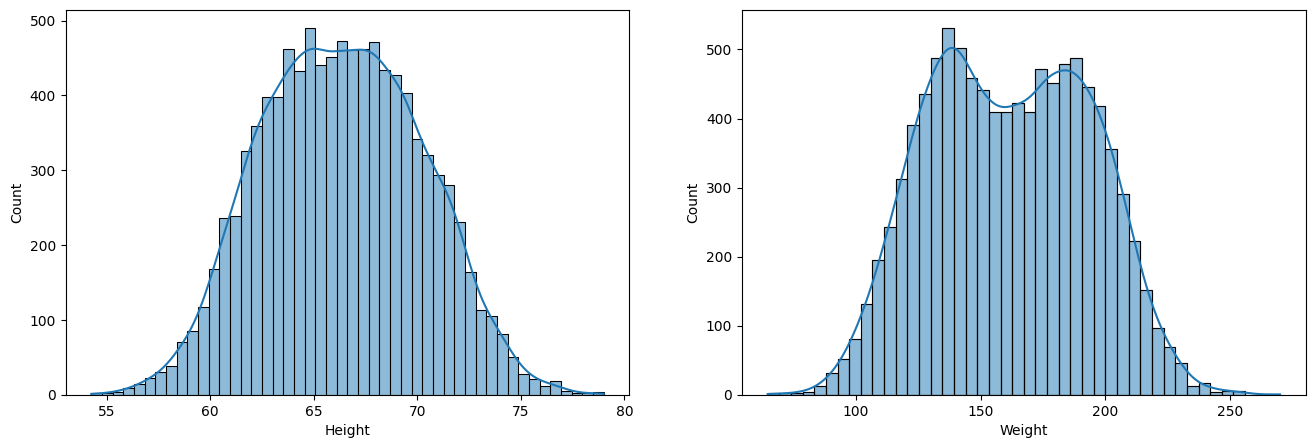

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['Height'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['Weight'], kde=True)

plt.show() # so it seems it's semtric

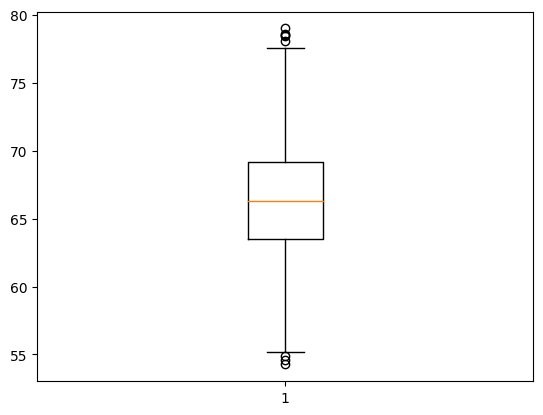

In [10]:
height_boxplot = plt.boxplot(df["Height"])

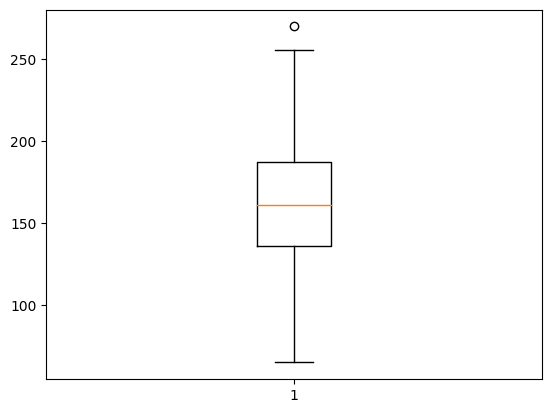

In [11]:

height_boxplot = plt.boxplot(df["Weight"])

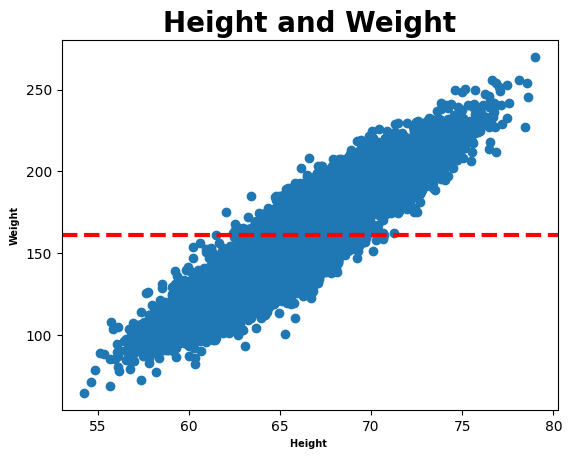

In [12]:
plt.scatter(x=df["Height"],y=df["Weight"])
plt.title('Height and Weight',fontsize = 20, weight = "bold")
plt.xlabel('Height ',fontsize = 7, weight = "bold")
plt.ylabel('Weight',fontsize = 7, weight = "bold")

plt.axhline(
  y=np.nanmean(df["Weight"]), 
  color = 'r',
  linestyle = '--', 
  linewidth = 3
)

In [13]:
def removes_outliers(df):
    threshold=1.5
  # Create a copy
    df_new = df.copy()

  # Iterate through numeric columns and replace outliers
    for i in df_new.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']):
    # calculate iqr and thresholds
        Q1 = df_new[i].quantile(0.25)
        Q3 = df_new[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_threshold = Q1 - threshold * IQR
        upper_threshold = Q3 + threshold * IQR
        # identify outliers and makes it detect zeros 
        outliers = ((df_new[i] < lower_threshold) | (df_new[i] > upper_threshold)) 
    
        # Replace outliers with the mean
        df_new = df_new.loc[~outliers,:] # by this way i have filterd the outliers and now the nonoutliers is only here
    return df_new



In [14]:
df2 = removes_outliers(df)

In [15]:
df2.shape

(9992, 3)

In [16]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [17]:
label_encoder = preprocessing.LabelEncoder() 

def convert_categorical_to_num(column):
    df2[column]= label_encoder.fit_transform(df2[column]) 
    return df2[column]



In [18]:
X = df2[["Height","Weight"]]
Y = convert_categorical_to_num("Gender")

In [19]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Gender, Length: 9992, dtype: int64

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2) 

In [21]:
model = LinearRegression() 
model.fit(x_train,y_train) # fitting the data

LinearRegression()

In [22]:
model.predict([[73.847017,241.893563]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.55879475])

In [23]:
model.score(x_test,y_test)

0.6429794408370727